# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1



Importing libraries


In [14]:
import pandas as pd
import numpy as np
#For visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset and make a copy.
data = pd.read_csv('food_claims_2212.csv')
df = data.copy()

In [3]:
#First glance. Print top 5 rows with head() method.
df.head(n = 5)
#Default value for n is 5. You can write df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


**Comment**:
- There are 8 columns. 
- Two columns (amount_paid and linked_cases) have null values. 
- Columns called claim_amount dtype must be change to float.
- Columns' names are sufficient. They do not contain upper letters. Two of them one-word others are named by snake case.

**Code**: df.info()


In [4]:
#Information about data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


**Evaluation according to criteria**

Column name: **claim_id** -> Unique values. **(1)**
-- --
Column name: **time_to_close** -> There are no null values. All of the values are positive. **(2)**
-- --
Column name: **claim_amount** -> There are no null values. I have two options:
- Create new column, convert dtype to float and drop the old column.
- Replace old values with new values and rename the column. 
I choose first option. I convert column's dtype to float because when I need calculations, I can't use object it will spoil my calculations and my choice. I need numeric values. **(3)**
-- --
Column name: **amount_paid** -> There are 36 null values. According to criteria I have to replace null values with median. **(4)**
-- --
Column name: **location** -> There are no null values. This column must have 4 unique value. “RECIFE”, “SAO LUIS”,“FORTALEZA”, and “NATAL”. Let's check. **(5)**
-- --
Column name: **individuals_on_claim** -> There are no null values. All values must be greater or equal 1. Let's check. **(6)**
-- --
Column name: **linked_cases** -> There are 26 null values. Replace missing values with FALSE. There must be two unique values True and False. Let's check. **(7)**
-- --
Column name: **cause** -> There are no null values. There must be three unique values “vegetable”, “meat” and “unknown”. Let's check. **(8)**

In [ ]:
#Evaluation according to criteria # 1
df['claim_id'].duplicated().sum()

In [ ]:
#Evaluation according to criteria # 2
sum(list(df['time_to_close'] < 0))

In [11]:
#Evaluation according to criteria # 3
new_column_name = 'claim_amount_R$'
new_column_value = [round(float(i[1]), 2) for i in df['claim_amount'].str.split()]
df[new_column_name] = new_column_value
df.drop('claim_amount', axis = 1, inplace = True)
df.head()

,claim_id,time_to_close,amount_paid,location,individuals_on_claim,linked_cases,cause,claim_amount_R$
0,1,317,51231.37,RECIFE,15,False,unknown,74474.55
1,2,195,42111.30,FORTALEZA,12,True,unknown,52137.83
2,3,183,23986.30,SAO LUIS,10,True,meat,24447.20
3,4,186,27942.72,FORTALEZA,11,False,meat,29006.28
4,5,138,16251.06,RECIFE,11,False,vegetable,19520.60


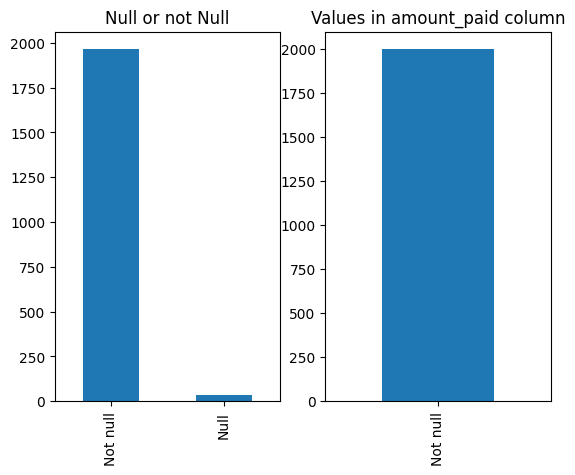

In [42]:
#Evaluation according to criteria # 4

median_amount_paid = round(df['amount_paid'].median(), 2)

#I use data here not copy (df). Because when I replace null values there will no null values and I can't visualize it. 
before_filling_na = data['amount_paid'].isna().value_counts()
before_filling_na.index = ['Not null', 'Null']
plt.subplot(1, 2, 1)
before_filling_na.plot(kind='bar');
plt.title('Null or not Null');

df['amount_paid'].fillna(median_amount_paid, inplace=True)
after_filling_na = df['amount_paid'].isna().value_counts()
after_filling_na.index = ['Not null']
plt.subplot(1, 2, 2)
after_filling_na.plot(kind='bar');
plt.title('Values in amount_paid column');

In [44]:
#Evaluation according to criteria # 5
df['location'].unique()

array(['RECIFE', 'FORTALEZA', 'SAO LUIS', 'NATAL'], dtype=object)

In [49]:
#Evaluation according to criteria # 6
sum(list(df['individuals_on_claim'] < 1))
# df['individuals_on_claim'] < 1 this code returns True or False. True is 1. False is 0. When I use sum 0 + 0 and this means there are no values less than 1.

0

Unique values: [False True nan]
Unique values: [False  True]


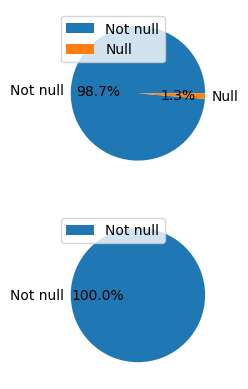

In [83]:
#Evaluation according to criteria # 7
#I use data here not copy (df). Because when I replace null values there will no null values and I can't visualize it. 
print(f'Unique values: {data["linked_cases"].unique()}')
plt.subplot(2, 1, 1)
ax = data['linked_cases'].isna().value_counts().plot(kind='pie', labels=['Not null', 'Null'], autopct='%1.1f%%');
ax.yaxis.set_visible(False)
plt.legend(loc='upper left');

df['linked_cases'].fillna(False, inplace = True)
plt.subplot(2, 1, 2)
ax = df['linked_cases'].isna().value_counts().plot(kind='pie', labels=['Not null', 'Null'], autopct='%1.1f%%');
ax.yaxis.set_visible(False)
plt.legend(loc='upper left');
print(f'Unique values: {df["linked_cases"].unique()}')


Unique values: ['unknown' 'meat' 'vegetable' ' Meat' 'VEGETABLES']
Unique values: ['unknown' 'meat' 'vegetable']


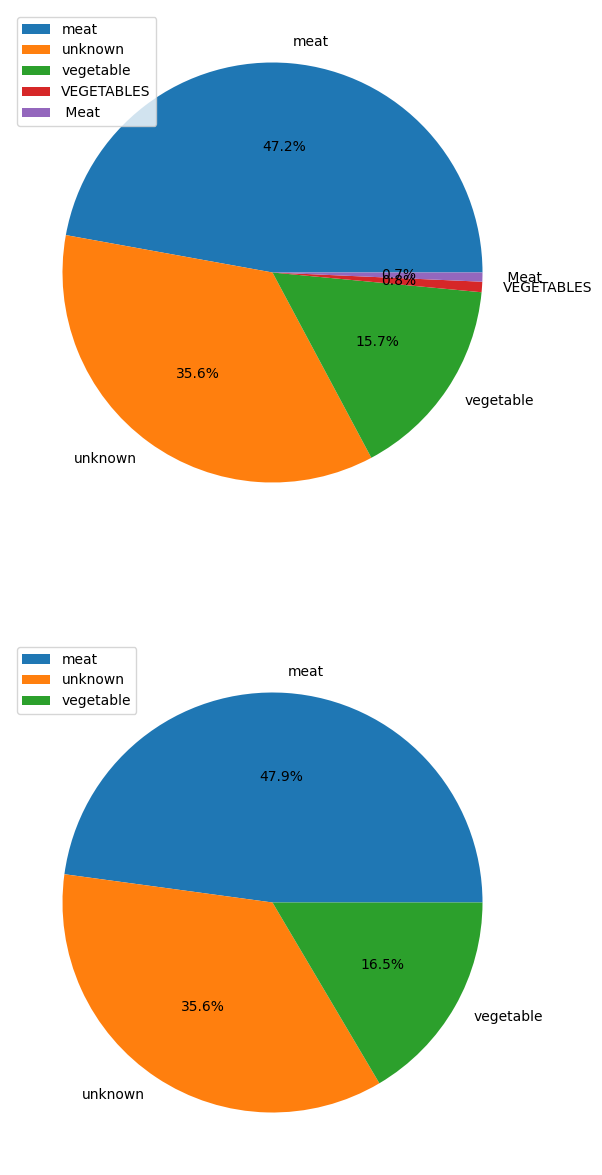

In [82]:
#Evaluation according to criteria # 8
plt.figure(figsize=(15, 15))

print(f'Unique values: {data["cause"].unique()}')
plt.subplot(2, 1, 1)
ax = data['cause'].value_counts().plot(kind='pie', autopct='%1.1f%%');
ax.yaxis.set_visible(False)
plt.legend(loc='upper left');
#There are 5 unique values. It is a problem. According to criteria this column must have 3 unique values. What problem is, ' Meat' is capitalize and contain white space, 'VEGETABLES' are all capital letters and last chracter is S.

#First I replace 'VEGETABLES' to 'vegetable'
df['cause'].replace({'VEGETABLES':'vegetable'}, inplace=True)

#Second remove all white space and use lower() method.
df['cause'] = df['cause'].str.strip().str.lower()
print(f'Unique values: {df["cause"].unique()}')
plt.subplot(2, 1, 2)
ax = df['cause'].value_counts().plot(kind='pie', autopct='%1.1f%%');
ax.yaxis.set_visible(False)
plt.legend(loc='upper left');

## Task 2

a. State which category of the variable location has the most observations

**Answer**: RECIFE has the most observations.
-- --
b. Explain whether the observations are balanced across categories of the
variable location.

**Answer**: Observations are not balanced across categories.As we see in the visualizations RECIFE has the highest percentage. We can say that observations are balanced between in NATAL and FORTALEZA. But in general, we can't say that. Because difference between percentage of observations increased unbalanced across categories.

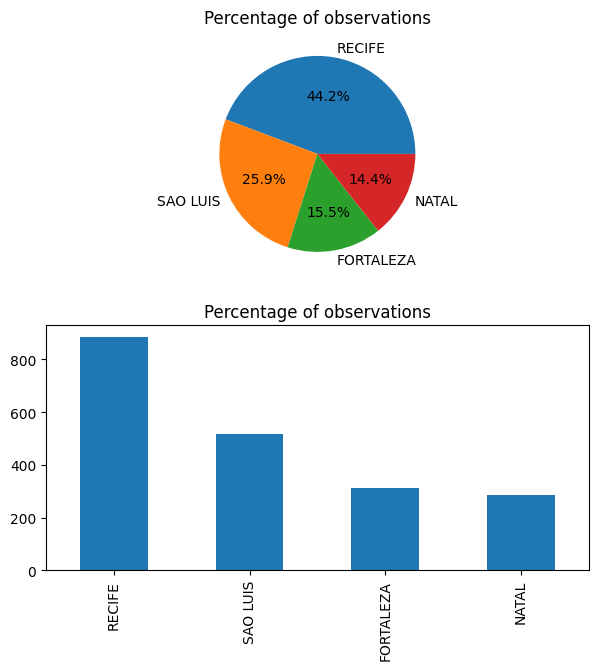

In [98]:
#a -> State which category of the variable location has the most observations
plt.figure(figsize=(7, 7))
plt.subplot(2, 1, 1)
ax = df['location'].value_counts().plot(kind='pie', labels = [i for i in df['location'].value_counts().index], autopct='%1.1f%%');
ax.yaxis.set_visible(False)
plt.title('Percentage of observations');

plt.subplot(2, 1, 2)
df['location'].value_counts().plot(kind='bar');
plt.title('Percentage of observations');

## Task 3

Describe the distribution of time to close for all claims. Your answer must include a
visualization that shows the distribution.

The histogram provides a visual representation of the distribution of time_to_close for all claims. Each bar in the histogram represents a specific range of time_to_close. The height of each bar indicates the number of claims that fall within that range.

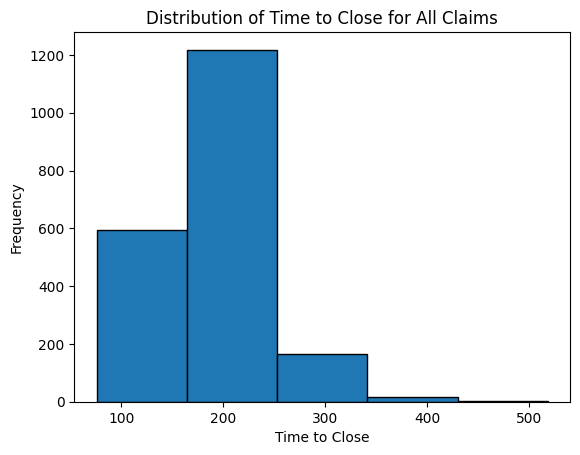

In [107]:
plt.hist(df['time_to_close'], bins=5, edgecolor='black');
plt.xlabel('Time to Close');
plt.ylabel('Frequency');
plt.title('Distribution of Time to Close for All Claims');

The KDE plot represents the density of claims at different time_to_close values along the x-axis. The y-axis represents the estimated density or likelihood of observing a claim at a particular time_to_close value.

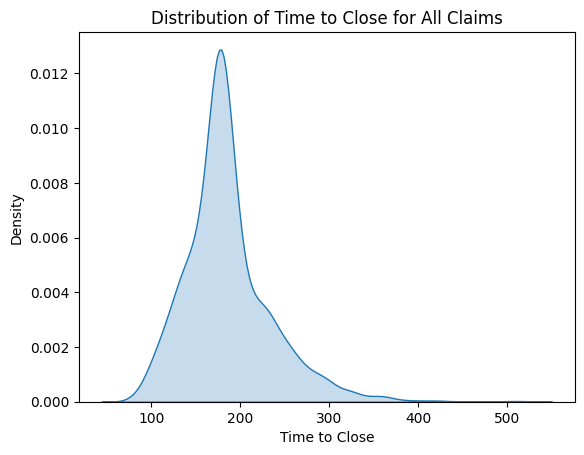

In [108]:
sns.kdeplot(df['time_to_close'], shade=True);
plt.xlabel('Time to Close');
plt.ylabel('Density');
plt.title('Distribution of Time to Close for All Claims');

## Task 4

Describe the relationship between time to close and location. Your answer must
include a visualization to demonstrate the relationship.

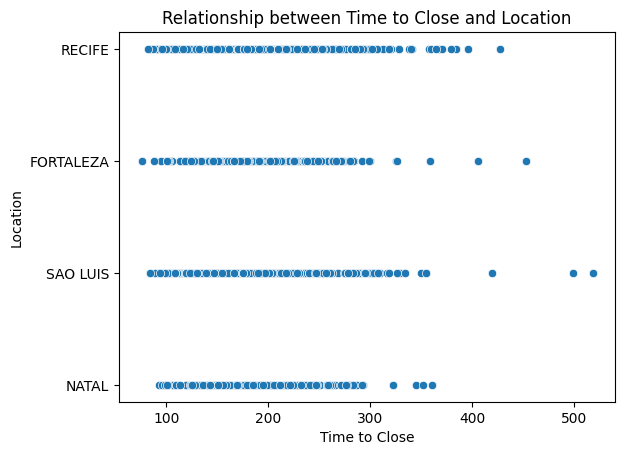

In [106]:
sns.scatterplot(data = df, x = 'time_to_close', y = 'location');
plt.xlabel('Time to Close');
plt.ylabel('Location');
plt.title('Relationship between Time to Close and Location');

In a box plot, each location is represented on the x-axis, while the time_to_close is represented on the y-axis. The box within the plot displays the interquartile range (IQR) of time to close for each location. The horizontal line within the box represents the median value. Additionally, the whiskers extend from the box to indicate the range of data, excluding outliers.

By examining the box plot, we can make several observations:

1. Median: The position of the median line within each box indicates the typical time to close for each location. Locations with a higher median suggest longer time to close, while locations with a lower median suggest shorter time to close.

2. Interquartile Range (IQR): The width of the box represents the IQR, which captures the middle 50% of time to close values for each location. A wider box suggests greater variability in time to close, while a narrower box suggests less variability.

3. Outliers: The presence of individual points outside the whiskers indicates potential outliers. These are data points that fall significantly above or below the majority of the time_to_close values for a particular location. Outliers can suggest unique cases or anomalies that deviate from the typical pattern.

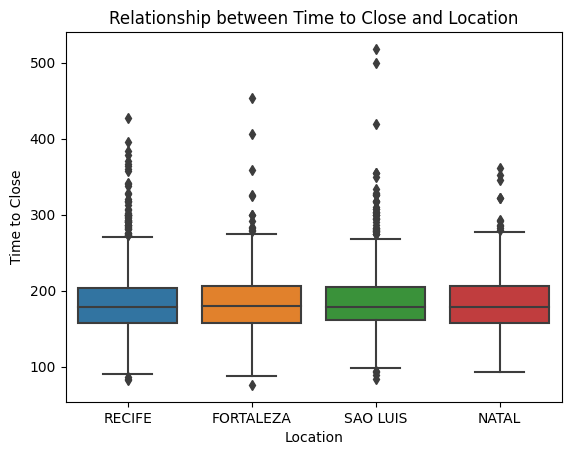

In [111]:
sns.boxplot(data = df, x = 'location', y = 'time_to_close');
plt.xlabel('Location');
plt.ylabel('Time to Close');
plt.title('Relationship between Time to Close and Location');

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam